In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

C:\Users\Teerawat\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Teerawat\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Teerawat\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Hypothesis:
H0 (null hypothesis): There is no significant association between gender and transportation used to commute to work.

Ha (alternative hypothesis): There is a significant association between gender and transportation used to commute to work.

In [2]:
# Data
data = {'Gender': ['Male', 'Male', 'Female', 'Male', 'Female', 'Female','Male', 'Female', 'Female', 'Female', 'Male'],
        'Transportation': ['Car', 'Public Transportation', 'Bicycle', 'Car', 'Public Transportation', 
                           'Bicycle','Car', 'Public Transportation', 'Bicycle', 'car','Bicycle']}
df = pd.DataFrame(data)
df

,Gender,Transportation
0,Male,Car
1,Male,Public Transportation
2,Female,Bicycle
3,Male,Car
4,Female,Public Transportation
5,Female,Bicycle
6,Male,Car
7,Female,Public Transportation
8,Female,Bicycle
9,Female,car


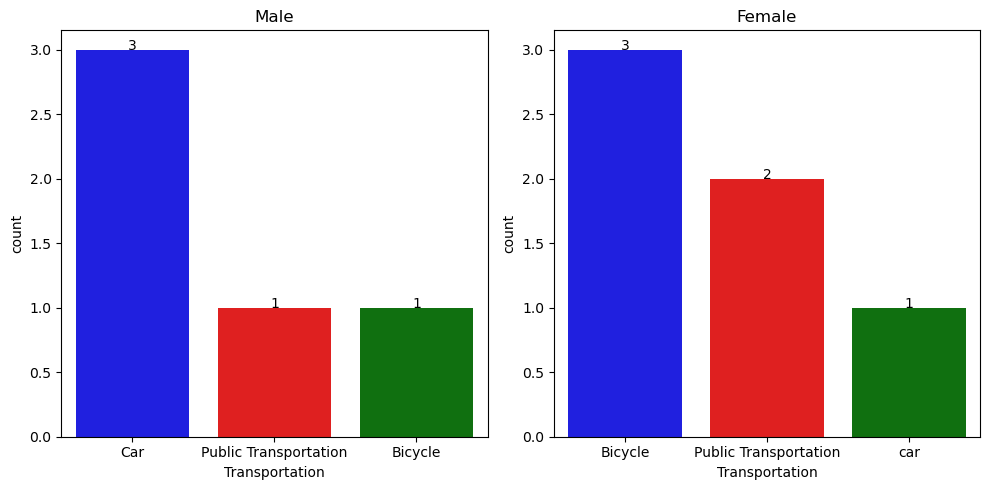

In [3]:
# Visualization of data
colors = ['blue', 'red', 'green']
sns.set_palette(colors)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

genders = ['Male', 'Female']
for i in range(2):
    g = df[df['Gender'] == genders[i]]
    sns.countplot(x='Transportation', data=g, ax=ax[i])
    ax[i].set_title(genders[i])
    for j in range(len(g['Transportation'].value_counts().index)):
        count = g['Transportation'].value_counts().values[j]
        ax[i].text(j, count, count, ha='center', color='black')

plt.tight_layout()
plt.show()

In [4]:
# Contingency table
ctab = pd.crosstab(df['Gender'], df['Transportation'])
ctab

Transportation,Bicycle,Car,Public Transportation,car
Gender,,,,
Female,3,0,2,1
Male,1,3,1,0


In [5]:
# Chi-squared test
stat, p, dof, expected = chi2_contingency(ctab)

# Interpret test-statistic and p-value
alpha = 0.05
if p > alpha:
    print('Fail to Reject H0 (No significant association between gender and transportation)')
else:
    print('Reject H0 (There is a significant association between gender and transportation)')

Fail to Reject H0 (No significant association between gender and transportation)
